## **Step 1. 스티커 구하기 or 만들기**
***
고양이는 사랑스럽기 때문에 고양이 수염 스티커를 붙여보겠습니다.

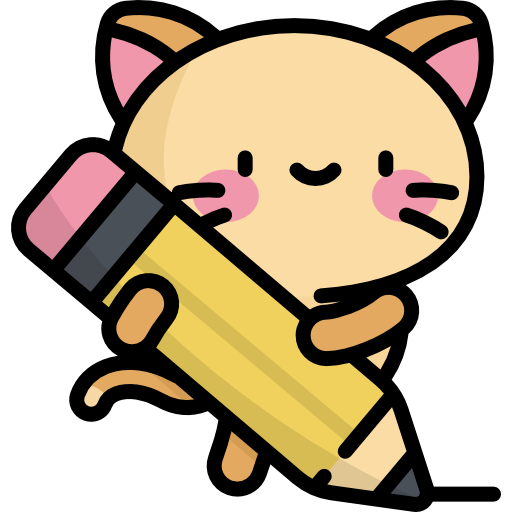

### **(1) 고양이 수염 이미지를 다운로드 받아주세요.**

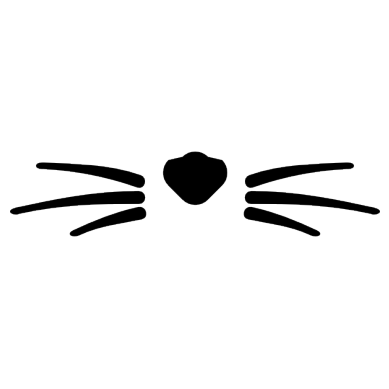

In [150]:
from PIL import Image

# 고양이 수염 이미지 파일 경로
cat_whisker_path = '/content/drive/MyDrive/07. GoData/08. cat-whiskers.png'

# 고양이 수염 이미지 불러오기
cat_whisker = Image.open(cat_whisker_path)

# 고양이 수염 이미지 표시
plt.imshow(cat_whisker)
plt.axis('off')  # 축 숨기기
plt.show()

### **(2) 여러분의 셀카 이미지도 촬영해 주세요.**

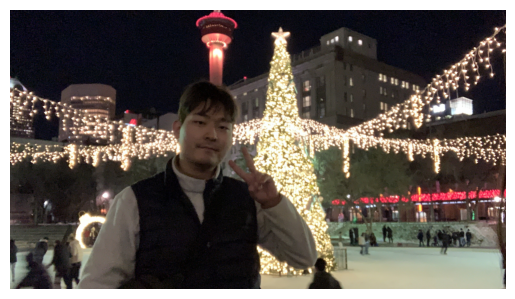

In [152]:
# 나의 이미지 파일 경로
go_path = '/content/drive/MyDrive/07. GoData/07. goCalgary.png'

# 나의 이미지 불러오기
go = Image.open(go_path)

# 나의 이미지 표시
plt.imshow(go)
plt.axis('off')  # 축 숨기기
plt.show()

## **Step 2. 얼굴 검출 & 랜드마크 검출 하기**
***
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

In [118]:
# 1. 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

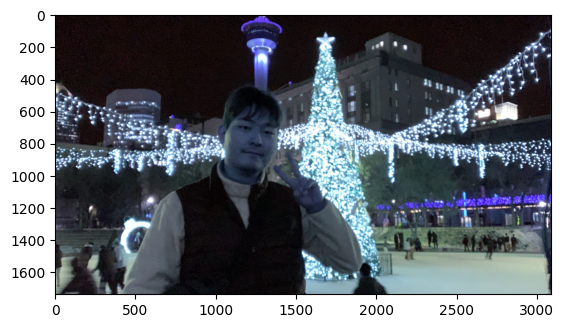

In [119]:
# 2. 테스트 이미지 읽고 출력하기
my_image_path = '/content/drive/MyDrive/07. GoData/07. goCalgary.png'

# 지정된 경로에서 이미지를 BGR 형식으로 읽음
# OpenCV는 이미지를 BGR 형식으로 읽음
img_bgr = cv2.imread(my_image_path)

# # 이미지를 화면에 표시하기 위해 복사본을 만듦
img_show = img_bgr.copy()

plt.imshow(img_bgr)
plt.show()

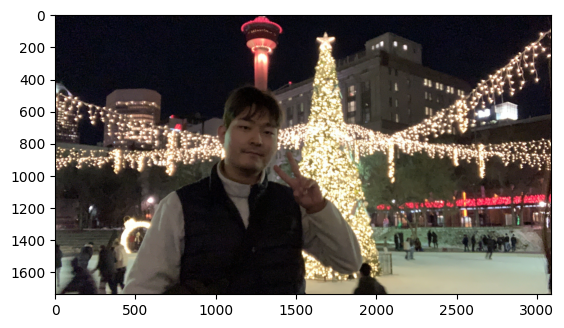

In [120]:
# 3. 표시하기 전에 이미지를 RGB로 변환하기

# OpenCV로 읽은 이미지는 BGR 형식이므로, 이를 RGB 형식으로 변환해야 올바르게 표시됨.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [121]:
# 4. 얼굴 탐지기 선언하기
detector_hog = dlib.get_frontal_face_detector()

In [122]:
# 5. bounding box 추출하기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(1060, 590) (1445, 975)]]


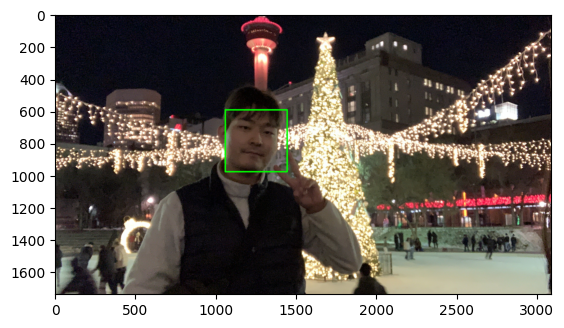

In [123]:
# 6. bounding box의 직사각형을 그리기
print(dlib_rects)
for dlib_rect in dlib_rects:
    # 각 경계 상자의 좌측(x) 좌표를 가져오기
    l = dlib_rect.left()
    # 각 경계 상자의 상단(y) 좌표를 가져오기
    t = dlib_rect.top()
    # 각 경계 상자의 우측(x) 좌표를 가져오기
    r = dlib_rect.right()
    # 각 경계 상자의 하단(y) 좌표를 가져오기
    b = dlib_rect.bottom()

    # OpenCV의 rectangle 함수를 사용하여 이미지에 경계 상자를 그림
    # 경계 상자의 색상은 초록색 (BGR: (0, 255, 0))이고, 두께는 10
    # lineType=cv2.LINE_AA는 경계선을 부드럽게 그리기 위한 안티앨리어싱 옵션
    cv2.rectangle(img_show, (l, t), (r, b), (0, 255, 0), 8, lineType=cv2.LINE_AA)

# BGR 형식의 이미지를 RGB 형식으로 변환하기
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# # 변환된 이미지를 Matplotlib를 사용하여 시각화하기
plt.imshow(img_show_rgb)
plt.show()

## **Step 3. 스티커 적용 위치 확인하기**
***
고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.

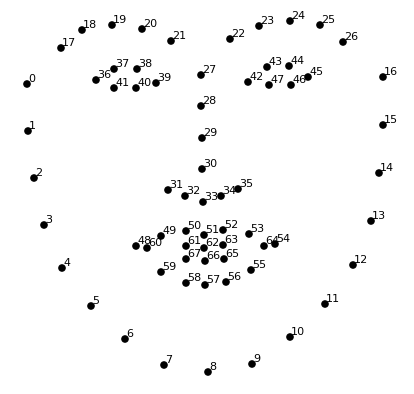

In [124]:
# 7. landmark model 다운로드하기
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2024-06-04 05:58:03--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  32.0MB/s    in 1.9s    

2024-06-04 05:58:05 (32.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [125]:
# 8. 압축파일 해제하기
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [126]:
# 9. 저장된 landmark model 불러오기
model_path = 'shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

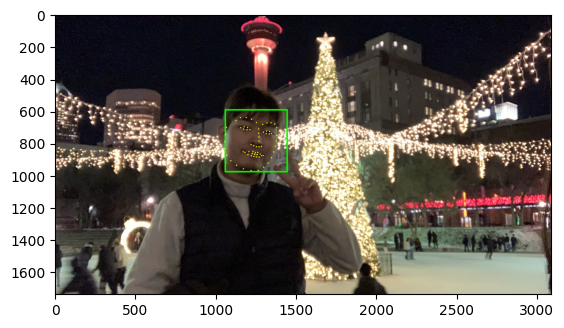

In [127]:
# 10. landmarks를 찾고 점으로 표시하기
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (0, 255, 255), -1)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## **Step 4. 스티커 적용하기**
***

### **(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.**

In [128]:
# 스티커 이미지 파일 경로를 지정하기
sticker_path = '/content/drive/MyDrive/07. GoData/08. cat-whiskers.png'

# 스티커 이미지를 알파 채널을 포함하여 읽기
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)

In [129]:
# 스티커 이미지를 원본 이미지에 오버레이(덧붙이기)
def overlay_sticker(image, sticker, position):
    # 원본 이미지와 스티커의 높이와 너비를 알아내기
    img_h, img_w = image.shape[:2]
    st_h, st_w = sticker.shape[:2]

    # 스티커를 붙일 위치를 계산하기
    x, y = position

    # 스티커의 중심이 지정된 위치에 오도록 조정하기
    x -= st_w // 2
    y -= st_h // 2

    # 스티커가 원본 이미지의 경계를 넘지 않도록 위치를 조정하기
    if x < 0: x = 0
    if y < 0: y = 0
    if x + st_w > img_w: st_w = img_w - x
    if y + st_h > img_h: st_h = img_h - y

    # 조정된 크기에 맞게 스티커 영역을 추출하기
    sticker_region = sticker[:st_h, :st_w]

    # 스티커의 알파 채널을 분리하기
    alpha_s = sticker_region[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    # 각 채널별로 np.where를 이용해 스티커와 원본 이미지를 합성하기
    for c in range(3):
        image[y:y+st_h, x:x+st_w, c] = np.where(
            alpha_s > 0,
            alpha_s * sticker_region[:, :, c] + alpha_l * image[y:y+st_h, x:x+st_w, c],
            image[y:y+st_h, x:x+st_w, c]
        )

    return image

In [130]:
# 얼굴 bounding box에 맞게 스티커 크기를 조정하는 함수 정의하기
def resize_sticker_to_fit(face_box, sticker_img):
    # 얼굴 bounding box의 너비와 높이
    box_w = face_box.width()
    box_h = face_box.height()

    # 스티커의 비율을 유지하면서 얼굴 bounding box에 맞게 크기 조정하기
    scale = box_w / sticker_img.shape[1]
    new_w = int(sticker_img.shape[1] * scale)
    new_h = int(sticker_img.shape[0] * scale)

    # 스티커 이미지를 크기 조정하기
    resized_sticker = cv2.resize(sticker_img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    return resized_sticker

In [131]:
# 얼굴 검출하기
faces = detector(img_rgb)
if len(faces) > 0:
    # 첫 번째 얼굴을 선택하기
    face = faces[0]

    # 얼굴 랜드마크를 예측하기
    landmarks = predictor(img_rgb, face)

    # 코 중심 위치 계산하기
    nose_center = (landmarks.part(30).x, landmarks.part(30).y)

    # 스티커 크기를 얼굴 크기에 맞게 조정하기
    resized_sticker = resize_sticker_to_fit(face, sticker_img)

    # 스티커를 원본 이미지에 적용하기
    result_img = overlay_sticker(img_rgb, resized_sticker, nose_center)

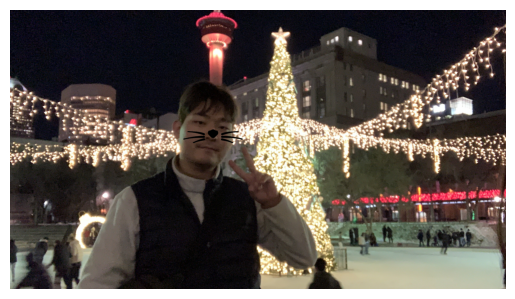

In [132]:
# 결과 이미지를 출력하기
plt.imshow(result_img)
plt.axis('off')
plt.show()

## **Step 5. 문제점 찾아보기**

### **(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.**

In [140]:
# 파일 경로
image_paths = [
    '/content/drive/MyDrive/07. GoData/09. goFace_basic.jpg',
    '/content/drive/MyDrive/07. GoData/10. goFace_left.jpg',
    '/content/drive/MyDrive/07. GoData/11. goFace_up.jpg',
    '/content/drive/MyDrive/07. GoData/12. goFace_white.jpg',
    '/content/drive/MyDrive/07. GoData/13. goFace_black.jpg'
]
sticker_path = '/content/drive/MyDrive/07. GoData/08. cat-whiskers.png'

In [141]:
# dlib의 얼굴 검출기와 랜드마크 예측기 불러오기
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# 스티커 이미지 읽기
sticker_img = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)

In [142]:
# 스티커 이미지를 원본 이미지에 오버레이하는 함수
def overlay_sticker(image, sticker, position):

    img_h, img_w = image.shape[:2]
    st_h, st_w = sticker.shape[:2]

    x, y = position
    x -= st_w // 2
    y -= st_h // 2

    if x < 0: x = 0
    if y < 0: y = 0
    if x + st_w > img_w: st_w = img_w - x
    if y + st_h > img_h: st_h = img_h - y

    sticker_region = sticker[:st_h, :st_w]
    alpha_s = sticker_region[:, :, 3] / 255.0

    # np.where를 사용하여 알파 채널에 따라 픽셀 값을 합성
    for c in range(3):
        image[y:y+st_h, x:x+st_w, c] = (alpha_s * sticker_region[:, :, c] +
                                        (1 - alpha_s) * image[y:y+st_h, x:x+st_w, c])
    return image

In [143]:
# 얼굴 bounding box에 맞게 스티커 크기를 조정하는 함수
def resize_sticker_to_fit(face_box, sticker_img):

    box_w = face_box.width()
    box_h = face_box.height()

    scale = box_w / sticker_img.shape[1]
    new_w = int(sticker_img.shape[1] * scale)
    new_h = int(sticker_img.shape[0] * scale)

    resized_sticker = cv2.resize(sticker_img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    return resized_sticker

In [144]:
# 얼굴 bounding box와 랜드마크를 그리는 함수
def draw_face_landmarks(image, face, landmarks):

    cv2.rectangle(image, (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 2)

    for i in range(68):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

In [145]:
# 이미지에 스티커를 적용하는 함수
def apply_sticker_to_image(image_path, sticker_img):

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = detector(img_rgb)
    if len(faces) > 0:
        face = faces[0]
        landmarks = predictor(img_rgb, face)

        draw_face_landmarks(img_rgb, face, landmarks)

        nose_center = (landmarks.part(30).x, landmarks.part(30).y)
        resized_sticker = resize_sticker_to_fit(face, sticker_img)
        result_img = overlay_sticker(img_rgb, resized_sticker, nose_center)
        return result_img
    return img_rgb

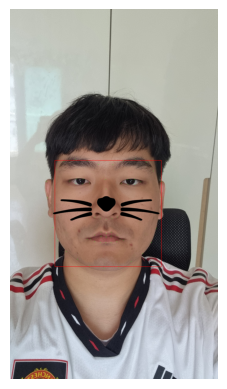

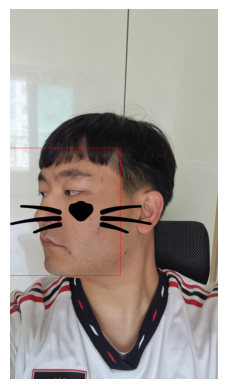

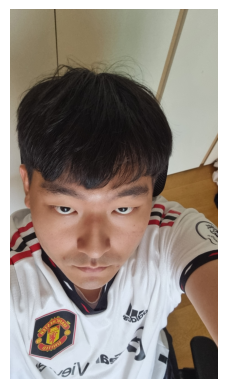

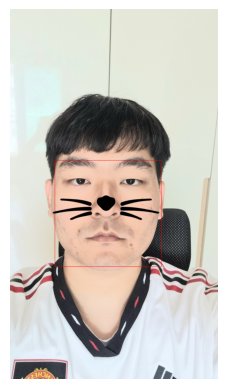

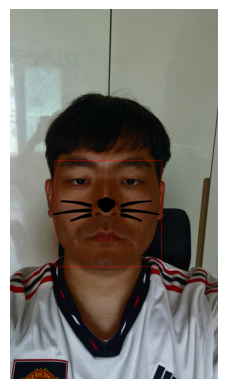

In [146]:
# 각 이미지에 스티커 적용하기
for image_path in image_paths:
    result_img = apply_sticker_to_image(image_path, sticker_img)
    plt.imshow(result_img)
    plt.axis('off')
    plt.show()

**스티커가 붙은 위치 분석**

1. **첫 번째 이미지 (야외 배경)**
* 스티커 위치: 코와 수염이 얼굴 중앙부에 위치.
* 문제점: 얼굴이 약간 오른쪽으로 기울어져 있지만 스티커는 정면 기준으로 배치되어 있음.
* 해결책: 얼굴 각도를 고려해 스티커의 위치와 모양을 조정해야 함.

2. **두 번째 이미지 (정면)**
* 스티커 위치: 얼굴 정중앙에 정확하게 위치.
* 문제점: 없음, 정면 얼굴에 적합한 배치.
* 해결책: 정확한 랜드마크 탐지가 이루어짐.

3. **세 번째 이미지 (측면 프로필)**
* 스티커 위치: 코와 수염이 얼굴 중앙에 위치.
* 문제점: 얼굴이 측면을 향하고 있지만 스티커는 여전히 정면 기준으로 배치됨.
* 해결책: 측면 프로필을 인식하고 스티커의 각도를 조정해야 함.

4. **네 번째 이미지 (위에서 아래로 촬영)**
* 스티커 위치: 없음, 얼굴을 인식하지 못함.
* 문제점:얼굴을 인식하지 못함.
* 해결책: 얼굴을 인식하지 못했을 때, 경고 메세지를 날리면 됨.

5. **다섯 번째 이미지 (밝은 조명)**
* 스티커 위치: 얼굴 정중앙에 정확하게 위치.
* 문제점: 없음, 정면 얼굴에 적합한 배치.
* 해결책: 정확한 랜드마크 탐지가 이루어짐.

6. **여섯 번째 이미지 (어두운 조명)**
* 스티커 위치: 얼굴 정중앙에 정확하게 위치.
* 문제점: 없음, 정면 얼굴에 적합한 배치.
* 해결책: 정확한 랜드마크 탐지가 이루어짐.

### **(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!**

> 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.
>
> * 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
* 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
* 실행 속도가 중요할까요?
* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

**종합 분석**
* **정면 얼굴**에서는 스티커의 위치가 정확하게 배치되는 경향이 있습니다.
* **측면 프로필**이나 **다양한 각도**에서는 스티커가 얼굴 각도를 제대로 반영하지 못하고 정면 기준으로 배치되는 문제점이 있습니다.
* **조명 조건**에 따라 스티커의 정확도가 약간 달라지지만, 전반적으로 양호한 성능을 보입니다.

**개선 방안**
* 얼굴 각도에 따라 스티커의 위치와 모양을 동적으로 조정할 수 있는 알고리즘을 도입해야 합니다.
* 측면 프로필과 다양한 촬영 각도를 인식하고 반영할 수 있는 모델을 훈련해야 합니다.
* 조명 조건에 관계없이 안정적인 랜드마크 탐지가 이루어지도록 모델을 개선해야 합니다.